# **PROBABILITY AND STATISTICS**
## End-of-course summative assessment 
##### Exam Number: B155243
##### *University of Edinburgh*

In [63]:
import numpy as np
import scipy.stats as st
import scipy.optimize as op
import statsmodels.stats.api as sm
import statsmodels.stats as smt
import statsmodels.api as sma
from statsmodels.api import OLS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
_ = sn.set_palette("summer")
_ = sn.axes_style("dark")

# Initial Steps - Reading, Summarising and Formatting Datasets

## Read the two datasets: covariates & biomarkers

### Step 1 - Reading both datasets
Read the datasets from the csv files

In [3]:
covariates_df = pd.read_excel("./data/covariates.xlsx")
biomarkers_df = pd.read_excel("./data/biomarkers.xlsx")

### Step 2 - Fix and summarise the covariates dataset
#### Display the first 5 records of the covariates dataset

In [4]:
covariates_df.head()

,PatientID,Age,"Sex (1=male, 2=female)","Smoker (1=yes, 2=no)",VAS-at-inclusion,Vas-12months
0,1,56,1,2,3.0,4.0
1,3,32,1,2,7.2,0.5
2,4,43,2,2,2.7,0.5
3,5,25,2,2,3.0,3.9
4,6,39,1,2,3.5,5.0


#### Display a summary of the table covariates

In [5]:
covariates_df.describe().round(2)

,PatientID,Age,"Sex (1=male, 2=female)","Smoker (1=yes, 2=no)",VAS-at-inclusion,Vas-12months
count,118.00,118.00,118.0,118.00,118.00,116.00
mean,75.45,40.86,1.5,1.67,6.02,3.62
std,43.33,10.14,0.5,0.47,2.66,3.08
min,1.00,18.00,1.0,1.00,0.00,0.00
25%,39.25,32.00,1.0,1.00,4.00,0.75
50%,72.50,41.00,1.5,2.00,6.50,3.50
75%,112.75,49.00,2.0,2.00,8.00,6.00
max,152.00,59.00,2.0,2.00,10.00,10.00


#### Fix the column names for Sex and Smoker and their data types
The two columns will be renamed and their data type will become a categorical type instead of integer

In [6]:
covariates_df.rename(columns={"Sex (1=male, 2=female)": "Sex", "Smoker (1=yes, 2=no)": "Smoker", "VAS-at-inclusion": "VAS0", "Vas-12months": "VAS12"}, inplace=True)
covariates_df["Sex"] = covariates_df["Sex"].astype('category')
covariates_df["Sex"] = covariates_df["Sex"].cat.rename_categories({1: 'Male', 2: 'Female'})
covariates_df["Smoker"] = covariates_df["Smoker"].astype('category')
covariates_df["Smoker"] = covariates_df["Smoker"].cat.rename_categories({1: 'Yes', 2: 'No'})

#### Display the first 5 records from the table covariates after the fixes

In [7]:
covariates_df.head()

,PatientID,Age,Sex,Smoker,VAS0,VAS12
0,1,56,Male,No,3.0,4.0
1,3,32,Male,No,7.2,0.5
2,4,43,Female,No,2.7,0.5
3,5,25,Female,No,3.0,3.9
4,6,39,Male,No,3.5,5.0


#### Print the columns datatypes to check if they are correct

In [8]:
covariates_df.dtypes

PatientID       int64
Age             int64
Sex          category
Smoker       category
VAS0          float64
VAS12         float64
dtype: object

#### Check if there are any NULL values in covariates and show them

In [9]:
covariates_df.isna().sum()

PatientID    0
Age          0
Sex          0
Smoker       0
VAS0         0
VAS12        2
dtype: int64

In [10]:
covariates_df[covariates_df["VAS12"].isna()]

,PatientID,Age,Sex,Smoker,VAS0,VAS12
32,42,27,Male,No,6.0,NaN
40,51,35,Female,Yes,7.5,NaN


#### Display a summary of the values in the dataset Covariates after the fixes

In [11]:
covariates_df.describe()

,PatientID,Age,VAS0,VAS12
count,118.000000,118.000000,118.000000,116.000000
mean,75.449153,40.855932,6.019492,3.619828
std,43.330493,10.137748,2.659486,3.079871
min,1.000000,18.000000,0.000000,0.000000
25%,39.250000,32.000000,4.000000,0.750000
50%,72.500000,41.000000,6.500000,3.500000
75%,112.750000,49.000000,8.000000,6.000000
max,152.000000,59.000000,10.000000,10.000000


### Step 3 - Fix and summarise the biomarkers dataset
#### Display the first 5 records

In [12]:
biomarkers_df.head()

,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,126-0weeks,7.63,11.51,10.20,8.83,3.52,6.16,9.45,7.91,8.41
1,126-6weeks,7.12,11.59,10.41,8.87,3.89,6.12,9.06,7.92,8.39
2,127-0weeks,6.93,10.92,10.30,6.59,2.73,6.14,7.31,7.95,8.40
3,127-6weeks,7.16,11.58,10.39,8.61,2.60,6.35,8.61,7.94,8.51
4,127-12months,6.87,11.13,10.25,7.44,3.92,6.15,8.79,7.94,8.46


#### Display a summary of the values in the table Biomarkers

In [13]:
biomarkers_df.describe().round(2)

,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
count,348.00,347.00,347.00,347.00,347.00,347.00,347.00,347.00,347.00
mean,7.41,11.66,10.67,7.95,3.25,6.47,8.29,8.29,8.54
std,0.96,0.67,0.40,0.95,0.95,0.79,1.25,0.58,0.25
min,1.00,10.21,9.67,5.64,1.60,4.61,5.68,6.70,7.95
25%,6.69,11.14,10.41,7.06,2.58,5.99,7.16,7.93,8.35
50%,7.36,11.51,10.62,7.90,3.07,6.35,8.37,8.25,8.53
75%,8.13,12.15,10.84,8.82,3.66,6.85,9.34,8.68,8.70
max,11.33,13.60,11.96,9.91,7.95,11.51,11.19,9.78,9.78


#### Print the data types of the columns in the biomarkers dataset to check if there are any anomalies

In [14]:
biomarkers_df.dtypes

Biomarker      object
IL-8          float64
VEGF-A        float64
OPG           float64
TGF-beta-1    float64
IL-6          float64
CXCL9         float64
CXCL1         float64
IL-18         float64
CSF-1         float64
dtype: object

#### Delete the NaN values from the biomarker dataset

In [15]:
# Drop Biomarker that have a NaN ID
biomarkers_index_to_drop = biomarkers_df[biomarkers_df["Biomarker"].isna()].index
biomarkers_df.drop(index=biomarkers_index_to_drop, inplace=True)

#### Create two new columns in the Biomarkers table:
- PatientID
- Timepoint

These columns will be created by splitting the existing column "Biomarker" into two and then setting the correct data type for each of the newly created columns

In [16]:
biomarkers_new_cols = biomarkers_df["Biomarker"].str.extract(r"(?P<PatientID>[0-9]+)\-(?P<Timepoint>.*)")
biomarkers_df = pd.concat([biomarkers_new_cols, biomarkers_df], axis=1)
biomarkers_df["PatientID"] = biomarkers_df["PatientID"].astype("int64")
biomarkers_df["Timepoint"] = biomarkers_df["Timepoint"].astype("category")
biomarkers_df.head()

,PatientID,Timepoint,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,126,0weeks,126-0weeks,7.63,11.51,10.20,8.83,3.52,6.16,9.45,7.91,8.41
1,126,6weeks,126-6weeks,7.12,11.59,10.41,8.87,3.89,6.12,9.06,7.92,8.39
2,127,0weeks,127-0weeks,6.93,10.92,10.30,6.59,2.73,6.14,7.31,7.95,8.40
3,127,6weeks,127-6weeks,7.16,11.58,10.39,8.61,2.60,6.35,8.61,7.94,8.51
4,127,12months,127-12months,6.87,11.13,10.25,7.44,3.92,6.15,8.79,7.94,8.46


#### Double check the datatypes of the newly created columns

In [17]:
biomarkers_df.dtypes

PatientID        int64
Timepoint     category
Biomarker       object
IL-8           float64
VEGF-A         float64
OPG            float64
TGF-beta-1     float64
IL-6           float64
CXCL9          float64
CXCL1          float64
IL-18          float64
CSF-1          float64
dtype: object

# Question 1
## Do the levels of biomarkers at inclusion vary between males and females?

H0: Level of Biomaker n at inclusion does not vary between males and females: μ-male = μ-female

H1: Level of Biomaker n at inclusion varies between males and females: μ-male ≠ μ-female

Join the covariates and biomarkers datasets in one dataset to separate each biomarker based on the sex and to filter for "week0" (at inclusion)

In [18]:
joined_df = covariates_df.merge(biomarkers_df, left_on="PatientID", right_on="PatientID", how="inner", suffixes=('', '_r'))
filter_condition = joined_df.Timepoint.str.match("0weeks")
at_inclusion_df = joined_df[filter_condition]
at_inclusion_df.head()

,PatientID,Age,Sex,Smoker,VAS0,VAS12,Timepoint,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,1,56,Male,No,3.0,4.0,0weeks,1-0weeks,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,3,32,Male,No,7.2,0.5,0weeks,3-0weeks,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,4,43,Female,No,2.7,0.5,0weeks,4-0weeks,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,5,25,Female,No,3.0,3.9,0weeks,5-0weeks,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,6,39,Male,No,3.5,5.0,0weeks,6-0weeks,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35


In [19]:
# Store the name of the biomarkers for later usage
biomarker_columns = at_inclusion_df.loc[:, "IL-8":].columns.values
print(f"The biomarkers columns that will be used: {biomarker_columns}")

The biomarkers columns that will be used: ['IL-8' 'VEGF-A' 'OPG' 'TGF-beta-1' 'IL-6' 'CXCL9' 'CXCL1' 'IL-18' 'CSF-1']


In [20]:
print(f"The joined dataset's shape is: {at_inclusion_df.shape}")

The joined dataset's shape is: (117, 17)


In [21]:
at_inclusion_flattened_df = at_inclusion_df.loc[:, ["Sex", *biomarker_columns]]
at_inclusion_flattened_df.head()

,Sex,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,Male,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,Male,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,Female,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,Female,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,Male,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35


In [22]:
at_inclusion_flattened_df.shape

(117, 10)

### Divide the joined dataset into two dataframes, one for males and one for females

In [23]:
at_inclusion_flattened_df_m = at_inclusion_flattened_df.loc[at_inclusion_flattened_df.Sex == "Male", biomarker_columns]
at_inclusion_flattened_df_f = at_inclusion_flattened_df.loc[at_inclusion_flattened_df.Sex == "Female", biomarker_columns]

print("Biomarkers for males at inclusion:")
print(at_inclusion_flattened_df_m.head())
print(at_inclusion_flattened_df_m.shape)

print("\nBiomarkers for females at inclusion:")
print(at_inclusion_flattened_df_f.head())
print(at_inclusion_flattened_df_m.shape)

Biomarkers for males at inclusion:
    IL-8  VEGF-A    OPG  TGF-beta-1  IL-6  CXCL9  CXCL1  IL-18  CSF-1
0   8.13   12.35  10.48        8.66  2.63   6.54   9.54   8.53   8.27
3   6.55   11.21  10.49        6.83  2.58   5.31   6.71   7.71   8.30
12  6.54   11.47  10.20        7.16  3.38   6.51   7.79   8.54   8.35
18  8.32   12.85  10.41        8.00  3.26   6.04   8.94   8.92   8.39
27  7.78   11.33  10.63        7.42  2.53   6.15   7.29   7.84   8.18
(59, 9)

Biomarkers for females at inclusion:
    IL-8  VEGF-A    OPG  TGF-beta-1  IL-6  CXCL9  CXCL1  IL-18  CSF-1
6   6.47   11.13  10.72        6.90  5.62   5.46   7.73   8.02   8.19
9   6.41   11.15  10.60        7.26  1.96   5.35   7.15   7.66   8.10
15  6.92   11.06  10.28        7.17  2.48   6.41   6.94   8.78   8.17
21  9.01   12.53  11.68        9.26  3.76   6.83  11.19   9.06   8.95
24  8.67   12.23  10.43        8.34  4.00   6.59   9.45   9.13   8.40
(59, 9)


### Identifying and removing outliers using IQR

*https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba*

In [24]:
Q1_m = at_inclusion_flattened_df_m.quantile(0.25)
Q3_m = at_inclusion_flattened_df_m.quantile(0.75)
IQR_m = Q3_m - Q1_m

Q1_f = at_inclusion_flattened_df_f.quantile(0.25)
Q3_f = at_inclusion_flattened_df_f.quantile(0.75)
IQR_f = Q3_f - Q1_f

pd.DataFrame(data={"Male IQR": IQR_m, "Female IQR": IQR_f})

,Male IQR,Female IQR
IL-8,1.390,1.0225
VEGF-A,1.065,1.0275
OPG,0.345,0.5025
TGF-beta-1,1.700,1.3225
IL-6,1.055,1.2100
CXCL9,0.920,0.8225
CXCL1,2.025,2.1400
IL-18,0.825,0.6700
CSF-1,0.285,0.3300


#### Remove the outliers
Outliers are first set to NULL then automatically removed in the next operation when a pivot table is created.
Cleanup of the outliers should be done for each biomarker and for each sex independtly. So for the same biomarker, outliers for females are not the same for males because they are treated as two different samples.
Fot the above reasons, the removal of outliers is executed for each sex independtly then the samples are place together again in one table.

In [25]:
filter_m = (at_inclusion_flattened_df_m < (Q1_m - 1.5 * IQR_m)) | (at_inclusion_flattened_df_m > (Q3_m + 1.5 * IQR_m))
filter_f = (at_inclusion_flattened_df_f < (Q1_f - 1.5 * IQR_f)) | (at_inclusion_flattened_df_f > (Q3_f + 1.5 * IQR_f))

at_inclusion_filtered_df_m = at_inclusion_flattened_df_m[~filter_m]
at_inclusion_filtered_df_f = at_inclusion_flattened_df_f[~filter_f]
at_inclusion_filtered_df_m["Sex"] = "Male"
at_inclusion_filtered_df_f["Sex"] = "Female"
at_inclusion_filtered_df = at_inclusion_filtered_df_m.append(at_inclusion_filtered_df_f)

print("Number of values removed:")
at_inclusion_filtered_df.isna().sum() #NAs Will be removed by the pivot function below

Number of values removed:


IL-8           1
VEGF-A         0
OPG           10
TGF-beta-1     0
IL-6           3
CXCL9          3
CXCL1          0
IL-18          2
CSF-1          1
Sex            0
dtype: int64

#### The biomarkers are stacked to have one biomarker per row instead of having them all in one row for each observation

#### The stacked dataset <span style="color:red">before filtering outliers</span>:

In [26]:
# this stacked dataset is created without filtering outliers to test the hypothesis results before the filtering
at_inclusion_stacked_df = at_inclusion_df.loc[:, ["Sex", *biomarker_columns]].pivot(columns='Sex', values=biomarker_columns).stack([0,1]).reset_index()
at_inclusion_stacked_df.columns = ["IndexID", "Biomarker", "Sex", "Value"]
at_inclusion_stacked_df.tail()

,IndexID,Biomarker,Sex,Value
1048,344,IL-6,Male,2.64
1049,344,IL-8,Male,6.93
1050,344,OPG,Male,10.46
1051,344,TGF-beta-1,Male,6.62
1052,344,VEGF-A,Male,10.95


#### The stacked dataset <span style="color:red">after filtering outliers</span>:

In [27]:
# this stacked dataset is created after filtering outliers to test the hypothesis results after the filtering
at_inclusion_filtered_stacked_df = at_inclusion_filtered_df.loc[:, ["Sex", *biomarker_columns]].pivot(columns='Sex', values=biomarker_columns).stack([0,1]).reset_index()
at_inclusion_filtered_stacked_df.columns = ["IndexID", "Biomarker", "Sex", "Value"]
at_inclusion_filtered_stacked_df.head()

,IndexID,Biomarker,Sex,Value
0,0,CSF-1,Male,8.27
1,0,CXCL1,Male,9.54
2,0,CXCL9,Male,6.54
3,0,IL-18,Male,8.53
4,0,IL-6,Male,2.63


In [28]:
# Test whether each sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution.
# It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
# Compare the p-value to a significance level

# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html


def _normality_test(a, axis=0, nan_policy='propagate'):
    _, p = st.normaltest(a, axis, nan_policy)
    return p

# The default significance level is set to 0.01
def _normality_test_result(a, alpha=0.01, axis=0, nan_policy='propagate'):
    _, p = st.normaltest(a, axis, nan_policy)
    # Null hypothesis: x comes from a normal distribution
    return  "Reject / Is not Normal" if p < alpha else "Cannot Reject / Is Normal"


####  D’Agostino and Pearson’s test of normality on the data <span style="color:red">before removing the outliers</span>:

In [29]:
# Null hypothesis: The sample comes from a normal distribution
at_inclusion_stacked_df.groupby(by=["Biomarker","Sex"], sort=True, as_index=True).agg([_normality_test, _normality_test_result])["Value"].round(6)

_normality_test     _normality_test_result
Biomarker  Sex                                               
CSF-1      Male           0.923477  Cannot Reject / Is Normal
           Female         0.012154  Cannot Reject / Is Normal
CXCL1      Male           0.000006     Reject / Is not Normal
           Female         0.047508  Cannot Reject / Is Normal
CXCL9      Male           0.000000     Reject / Is not Normal
           Female         0.000000     Reject / Is not Normal
IL-18      Male           0.675231  Cannot Reject / Is Normal
           Female         0.899612  Cannot Reject / Is Normal
IL-6       Male           0.037913  Cannot Reject / Is Normal
           Female         0.000001     Reject / Is not Normal
IL-8       Male           0.828230  Cannot Reject / Is Normal
           Female         0.000119     Reject / Is not Normal
OPG        Male           0.003334     Reject / Is not Normal
           Female         0.236999  Cannot Reject / Is Normal
TGF-beta-1 Male           0.000000     Reject / Is not Normal
           Female         0.050951  Cannot Reject / Is Normal
VEGF-A     Male           0.091760  Cannot Reject / Is Normal
           Female         0.405606  Cannot Reject / Is Normal

####  D’Agostino and Pearson’s test of normality on the data <span style="color:red">**after removing the outliers**:</span>

In [30]:
# Null hypothesis: The sameple comes from a normal distribution
at_inclusion_filtered_stacked_df.groupby(by=["Biomarker","Sex"], sort=True, as_index=True).agg([_normality_test, _normality_test_result])["Value"].round(3)

_normality_test     _normality_test_result
Biomarker  Sex                                               
CSF-1      Female            0.650  Cannot Reject / Is Normal
           Male              0.923  Cannot Reject / Is Normal
CXCL1      Female            0.048  Cannot Reject / Is Normal
           Male              0.000     Reject / Is not Normal
CXCL9      Female            0.391  Cannot Reject / Is Normal
           Male              0.594  Cannot Reject / Is Normal
IL-18      Female            0.946  Cannot Reject / Is Normal
           Male              0.675  Cannot Reject / Is Normal
IL-6       Female            0.110  Cannot Reject / Is Normal
           Male              0.038  Cannot Reject / Is Normal
IL-8       Female            0.201  Cannot Reject / Is Normal
           Male              0.828  Cannot Reject / Is Normal
OPG        Female            0.535  Cannot Reject / Is Normal
           Male              0.668  Cannot Reject / Is Normal
TGF-beta-1 Female            0.051  Cannot Reject / Is Normal
           Male              0.000     Reject / Is not Normal
VEGF-A     Female            0.406  Cannot Reject / Is Normal
           Male              0.092  Cannot Reject / Is Normal

#### The distribution of biomarkers by sex <span style="color:red">before filtering outliers</span>:

<Figure size 432x288 with 0 Axes>

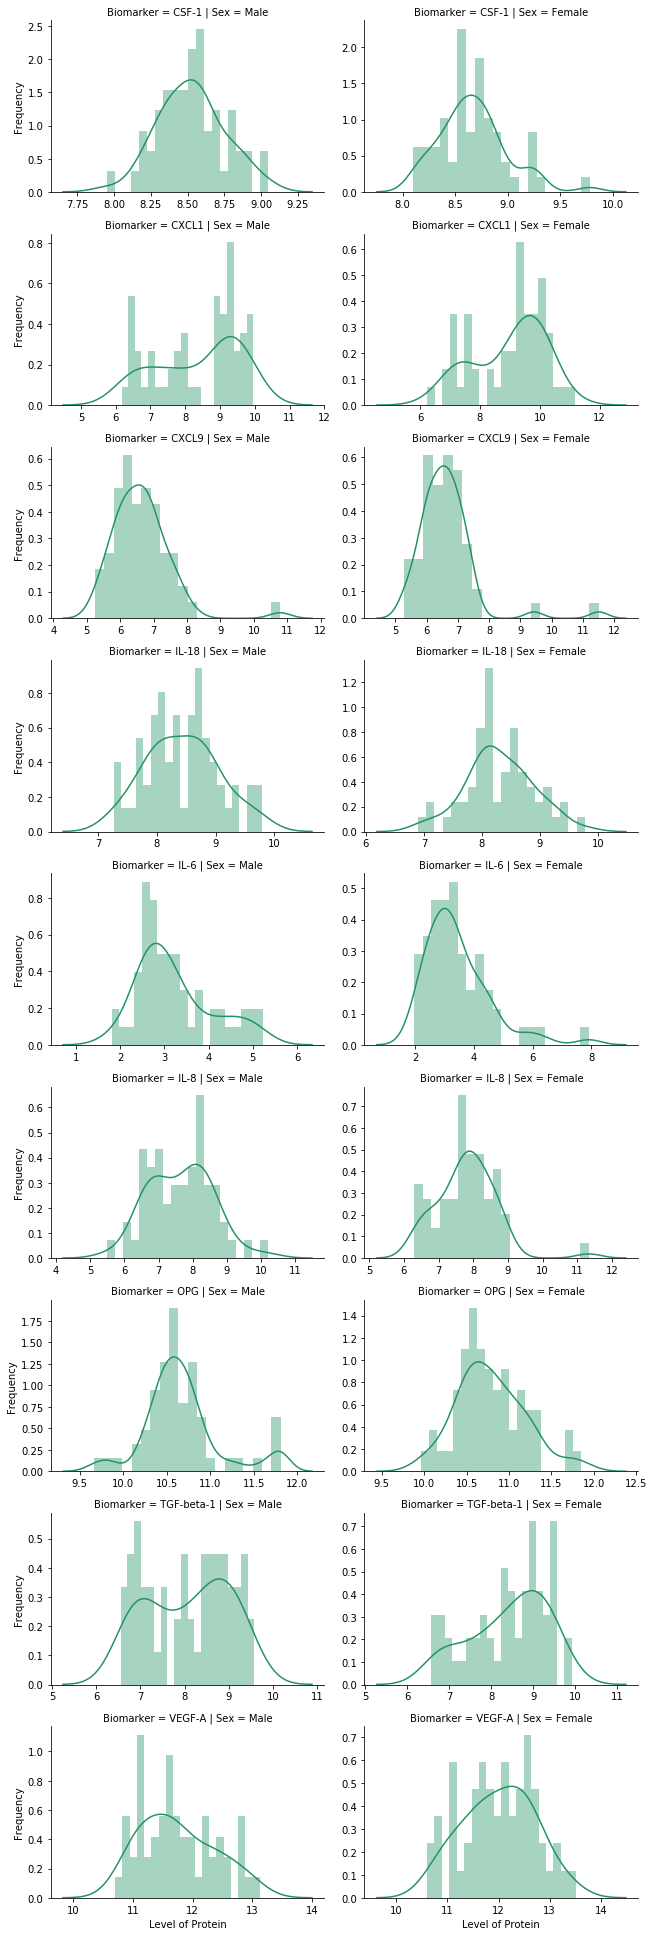

In [31]:
plt.figure()
g = sn.FacetGrid(at_inclusion_stacked_df, col="Sex", row="Biomarker", sharex=False, sharey=False, aspect=1.5)
g = g.map(sn.distplot, "Value", bins=20)
g.set_xlabels("Level of Protein")
g.set_ylabels("Frequency")
# g.set_title("The frequency distribution histogram of each protein by")
plt.savefig("./Charts/dists_1.png")

#### The distribution of biomarkers by sex <span style="color:red">after filtering outliers</span>:

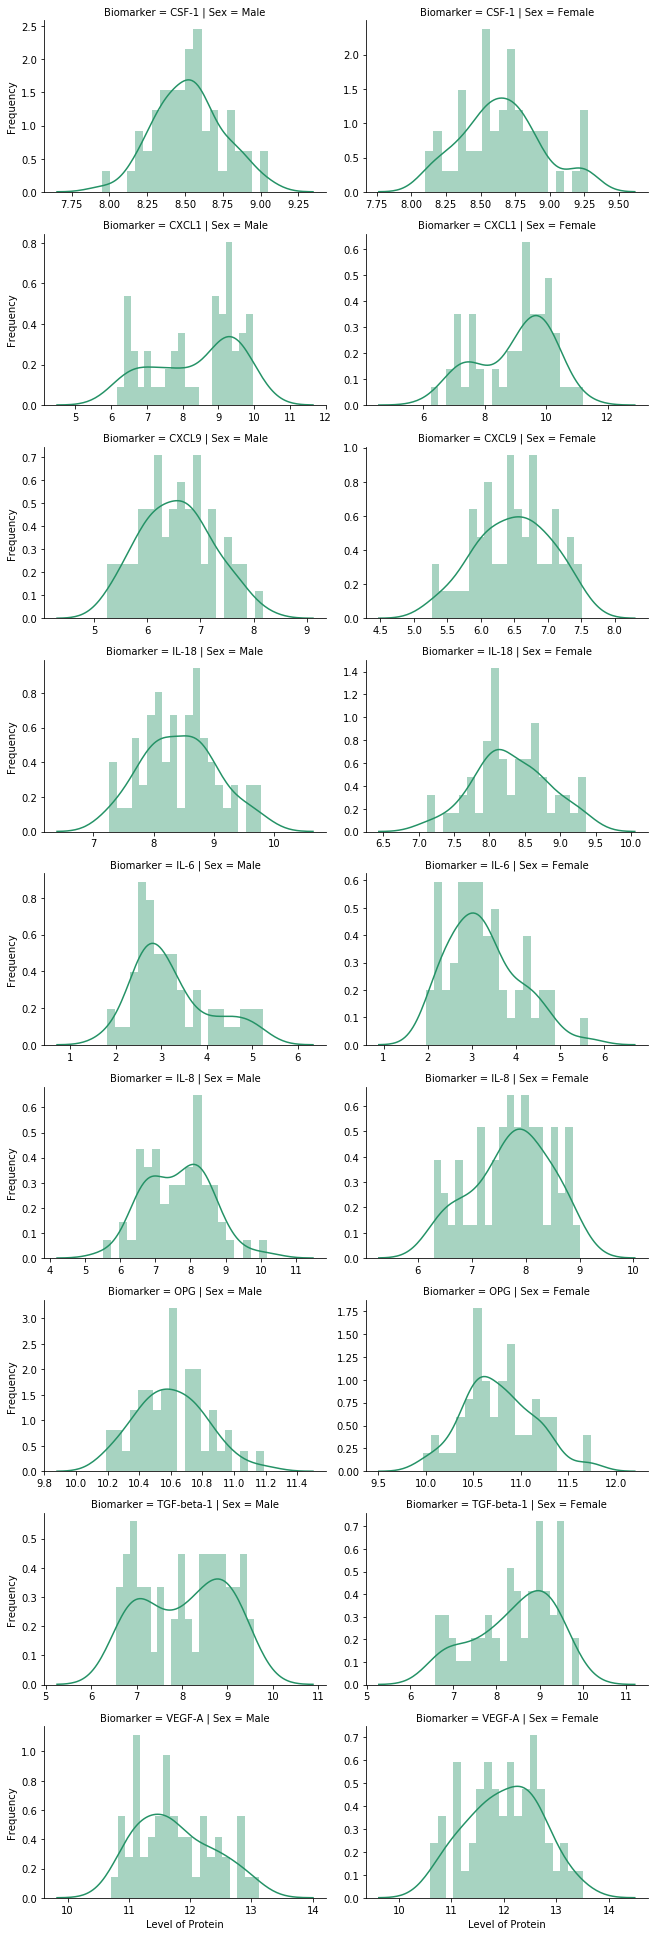

In [32]:
g = sn.FacetGrid(at_inclusion_filtered_stacked_df, col="Sex", row="Biomarker", sharex=False, sharey=False, aspect=1.5)
g = g.map(sn.distplot, "Value", bins=20)
g.set_xlabels("Level of Protein")
g.set_ylabels("Frequency")
# g.set_title("The frequency distribution histogram of each protein by")
plt.savefig("./Charts/dist_3.png")

#### Boxplots of biomarkers by sex <span style="color:red">before filtering outliers</span>:

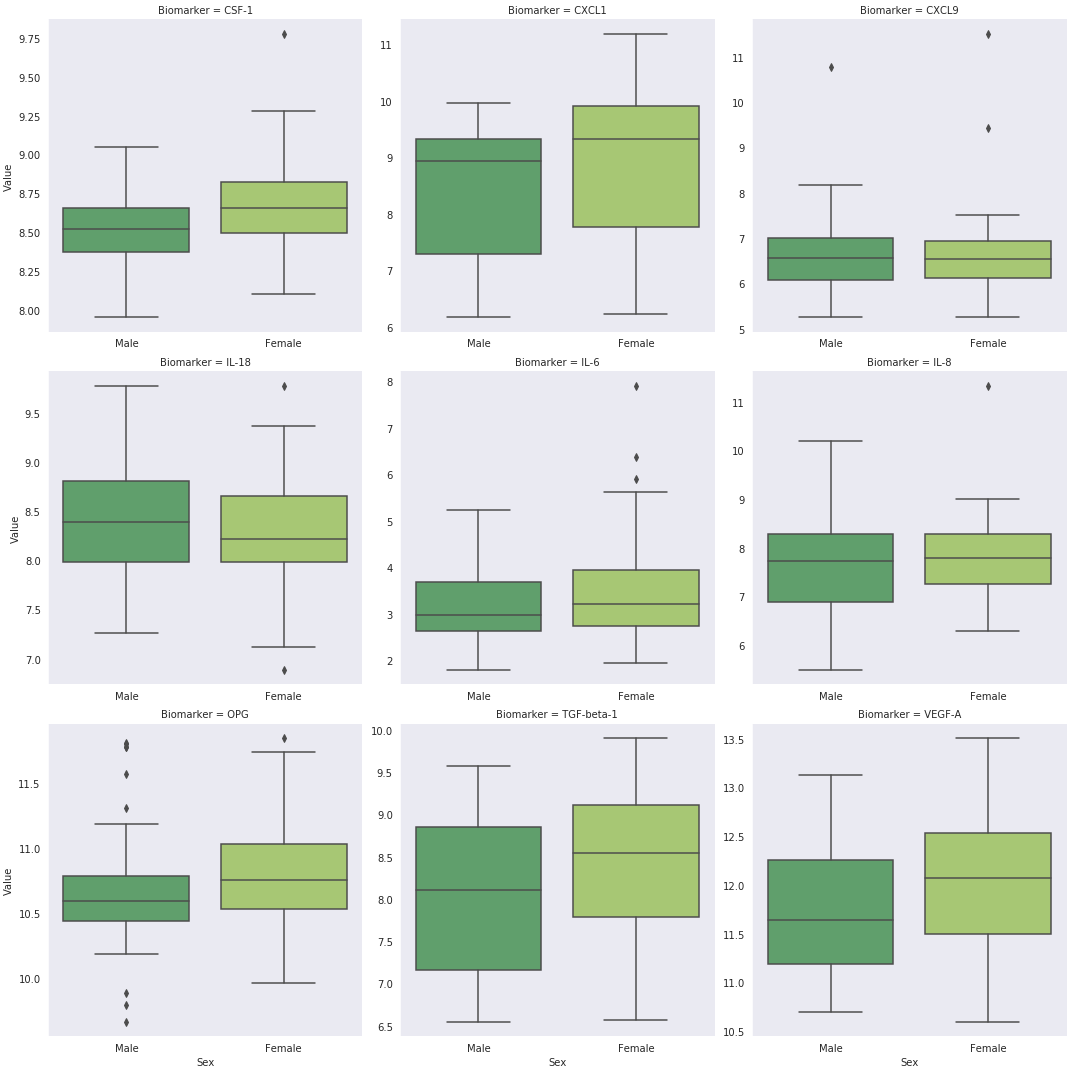

In [33]:
with sn.axes_style("dark"):
    g = sn.catplot(x="Sex", y="Value", col="Biomarker", data=at_inclusion_stacked_df, kind="box",
                 height=5, aspect=1, sharex=False, sharey=False, col_wrap=3, palette=sn.color_palette("summer", 2));
plt.savefig("./Charts/dist2.png")

#### Boxplots of biomarkers by sex <span style="color:red">after filtering outliers</span>:

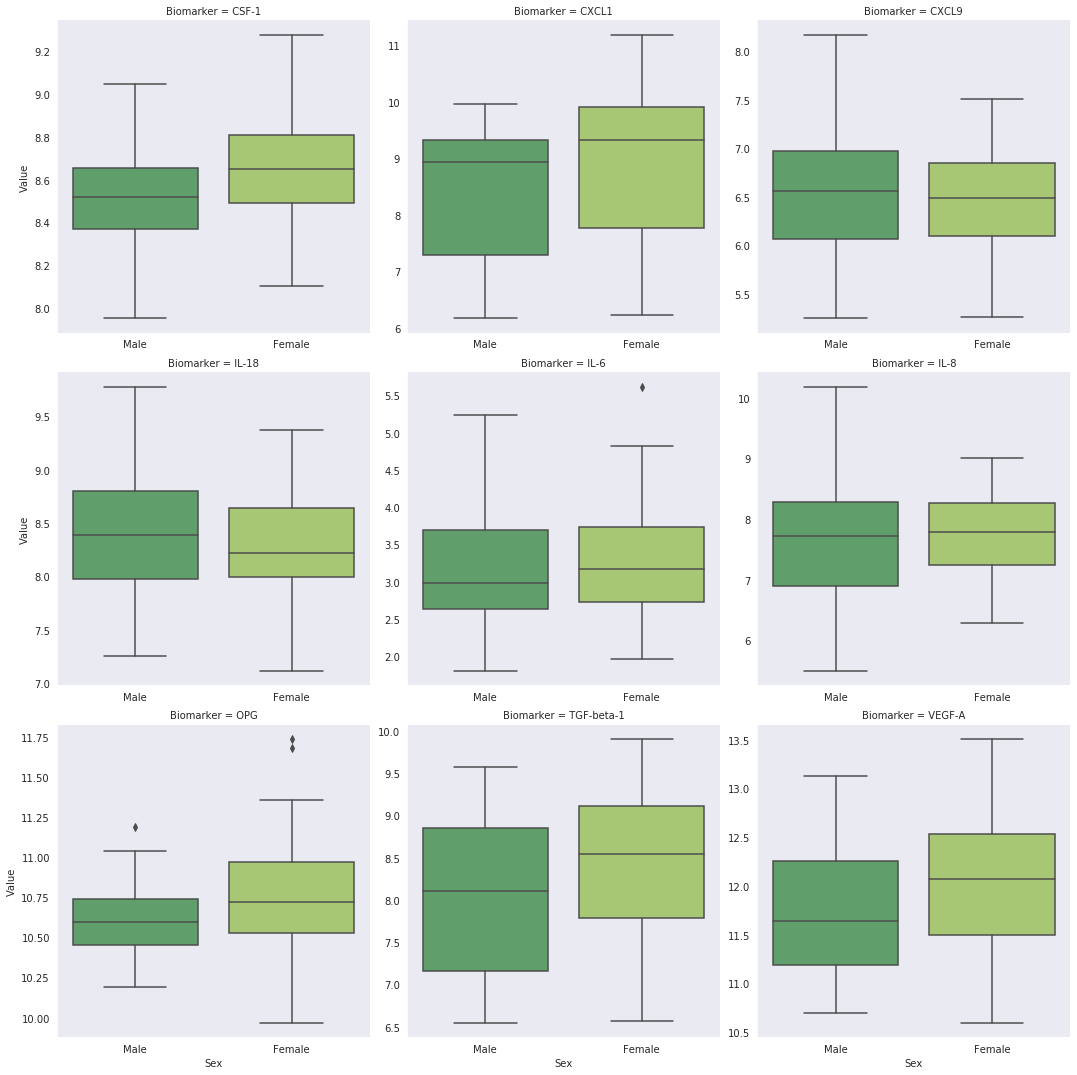

In [34]:
with sn.axes_style("dark"):
    g = sn.catplot(x="Sex", y="Value", col="Biomarker", data=at_inclusion_filtered_stacked_df, kind="box",
                 height=5, aspect=1, sharex=False, sharey=False, col_wrap=3, palette=sn.color_palette("summer", 2));

plt.savefig("./Charts/dist_4.png")    

### The hypothesis test <span style="color:red">before removing outliers</span> 

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.

Student's t test is used if the true variance of the populations from which the samples are extracted is unknown;

The use of Student's t test requires a decision to be taken beforehand on whether variances of the samples are to be considered equal or not. Fisher's F test can be used to test the hypothesis of equality of the variances..

Two-Sampled, two-tailed t-test of the difference of the mean of the samples.

***https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce***

***https://www.xlstat.com/en/solutions/features/two-sample-t-and-z-tests***

In [35]:
filter_condition = at_inclusion_df.Sex.str.match("Male")

# Multiple significance levels were only used for exploratory purposes not for p-hacking
# significance_levels = [0.1, 0.05, 0.01] # 90%, 95%, 99% Confidence
significance_levels = [0.05] # 95% Confidence

results_df = pd.DataFrame(columns=biomarker_columns, index=significance_levels, data=None)
results_dict = dict()

for alpha in significance_levels:
    print(f"The significance level alpha = {alpha}")
    for index, biomarker_column in enumerate(biomarker_columns):
        biomarker_1_values_male = at_inclusion_df.loc[filter_condition, biomarker_column]
        biomarker_1_values_female = at_inclusion_df.loc[~filter_condition, biomarker_column]


        # Calculate the power of the test
        # The power of the test, is one minus the probability of a
        # type II error. Power is the probability that the test correctly
        # rejects the Null Hypothesis if the Alternative Hypothesis is true.
        # https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26
        pow_nobs1 = biomarker_1_values_male.shape[0]
        pow_nobs2 = biomarker_1_values_female.shape[0] 
        pow_ratio = pow_nobs2 / pow_nobs1
        pow_mean_1 = np.mean(biomarker_1_values_male)
        pow_mean_2 = np.mean(biomarker_1_values_female)
        pow_var_1 = np.var(biomarker_1_values_male, ddof=1)
        pow_var_2 = np.var(biomarker_1_values_female, ddof=1)
        pow_effect_size = (pow_mean_1 - pow_mean_2) / np.sqrt(((pow_nobs1 - 1) * pow_var_1 + (pow_nobs2 - 1) * pow_var_2) / (pow_nobs1 + pow_nobs2 - 2))
        power = smt.power.tt_ind_solve_power(effect_size=pow_effect_size, nobs1=pow_nobs1, alpha=alpha, power=None, ratio=pow_ratio, alternative='two-sided')
        beta = 1 - power # Probability of a Type II error - Not rejecting a false H0
        
        # Sample bigger than 30 observation but the variance of the population from which the samples are extracted is unknown.
        print(f"Testing hypothesis for biomarker {biomarker_column}:")
        print(f"n_male = {biomarker_1_values_male.shape[0]}; n_female={biomarker_1_values_female.shape[0]};")
        print(f"H0: At inclusion, levels of biomarker {biomarker_column} do not vary between males and females. μ-male = μ-female")
        print(f"H1: At inclusion, levels of biomarker {biomarker_column} do vary between males and females. μ-male ≠ μ-female")

        tstat, pvalue = st.ttest_ind(biomarker_1_values_male, biomarker_1_values_female, equal_var=False)
        print(f"t-stat = {tstat}, p-value = {pvalue}, alpha = {alpha}, beta = {beta}, power={power}")
        
        # Store the results of the test for later
        results_dict[f"{biomarker_column}{' (' + str((1-alpha)*100)+'% Confidence)' if len(significance_levels) > 1 else ''}"] = {
            "alpha": alpha,
            "beta": beta,
            "power": power,
            "t-stat": tstat, 
            "p-value": pvalue,
            "t-test result": "Reject H0" if pvalue < alpha else " - "
        }
        
        
        if pvalue <= alpha:
            results_df.loc[alpha, biomarker_column] = "Reject"
            print(f"We reject the null hypothesis <=> we reject the hypothesis that inclusion does not vary between males and females for biomarker {biomarker_column}.")
        else:
            results_df.loc[alpha, biomarker_column] = "Can't reject"
            print(f"We don't have enough evidence to reject the null hypothesis for biomarker {biomarker_column}.")
        print("\n")
    print("==============================================\n")

The significance level alpha = 0.05
Testing hypothesis for biomarker IL-8:
n_male = 59; n_female=58;
H0: At inclusion, levels of biomarker IL-8 do not vary between males and females. μ-male = μ-female
H1: At inclusion, levels of biomarker IL-8 do vary between males and females. μ-male ≠ μ-female
t-stat = -0.9801571664207548, p-value = 0.3290732316677307, alpha = 0.05, beta = 0.8368867242757656, power=0.16311327572423437
We don't have enough evidence to reject the null hypothesis for biomarker IL-8.


Testing hypothesis for biomarker VEGF-A:
n_male = 59; n_female=58;
H0: At inclusion, levels of biomarker VEGF-A do not vary between males and females. μ-male = μ-female
H1: At inclusion, levels of biomarker VEGF-A do vary between males and females. μ-male ≠ μ-female
t-stat = -2.0607498156961435, p-value = 0.04162010149428021, alpha = 0.05, beta = 0.46588901652063963, power=0.5341109834793604
We reject the null hypothesis <=> we reject the hypothesis that inclusion does not vary between mal

#### Results of hypothesis testing <span style="color:red">before removing outliers</span> with 95% confidence:

In [36]:
results_df

,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0.05,Can't reject,Reject,Can't reject,Reject,Can't reject,Can't reject,Reject,Can't reject,Reject


#### Details of hypothesis testing <span style="color:red">before removing outliers</span> with 95% confidence:
*The dash (-) means that H0 was not rejected*

In [37]:
pd.DataFrame(data=results_dict).transpose()

,alpha,beta,power,t-stat,p-value,t-test result
IL-8,0.05,0.836887,0.163113,-0.980157,0.329073,-
VEGF-A,0.05,0.465889,0.534111,-2.06075,0.0416201,Reject H0
OPG,0.05,0.676196,0.323804,-1.51603,0.132273,-
TGF-beta-1,0.05,0.482739,0.517261,-2.02025,0.0456818,Reject H0
IL-6,0.05,0.792063,0.207937,-1.14992,0.25276,-
CXCL9,0.05,0.949959,0.0500406,0.0189791,0.984891,-
CXCL1,0.05,0.209845,0.790155,-2.79027,0.00616716,Reject H0
IL-18,0.05,0.790774,0.209226,1.15771,0.249382,-
CSF-1,0.05,0.203978,0.796022,-2.80239,0.00608143,Reject H0


### The hypothesis test <span style="color:red">after removing the outliers</span> 

In [38]:
filter_condition = at_inclusion_filtered_stacked_df.Sex.str.match("Male")

# significance_levels = [0.1, 0.05, 0.01] # 90%, 95%, 99% Confidence
significance_levels = [0.05] # 95% Confidence

results_df = pd.DataFrame(columns=biomarker_columns, index=significance_levels, data=None)
results_dict = dict()

for alpha in significance_levels:
    print(f"The significance level alpha = {alpha}")
    for index, biomarker_column in enumerate(biomarker_columns):
        biomarker_column_filter = at_inclusion_filtered_stacked_df.Biomarker.str.match(biomarker_column)
        biomarker_1_values_male = at_inclusion_filtered_stacked_df.loc[filter_condition & biomarker_column_filter, "Value"]
        biomarker_1_values_female = at_inclusion_filtered_stacked_df.loc[~filter_condition & biomarker_column_filter, "Value"]

        # Calculate the power of the test
        # The power of the test, is one minus the probability of a
        # type II error. Power is the probability that the test correctly
        # rejects the Null Hypothesis if the Alternative Hypothesis is true.
        # https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26
        pow_nobs1 = biomarker_1_values_male.shape[0]
        pow_nobs2 = biomarker_1_values_female.shape[0] 
        pow_ratio = pow_nobs2 / pow_nobs1
        pow_mean_1 = np.mean(biomarker_1_values_male)
        pow_mean_2 = np.mean(biomarker_1_values_female)
        pow_var_1 = np.var(biomarker_1_values_male, ddof=1)
        pow_var_2 = np.var(biomarker_1_values_female, ddof=1)
        pow_effect_size = (pow_mean_1 - pow_mean_2) / np.sqrt(((pow_nobs1 - 1) * pow_var_1 + (pow_nobs2 - 1) * pow_var_2) / (pow_nobs1 + pow_nobs2 - 2))
        power = smt.power.tt_ind_solve_power(effect_size=pow_effect_size, nobs1=pow_nobs1, alpha=alpha, power=None, ratio=pow_ratio, alternative='two-sided')
        beta = 1 - power # Probability of a Type II error - Not rejecting a false H0
        
        # Sample bigger than 30 observation but the variance of the population from which the samples are extracted is unknown.
        print(f"Testing hypothesis for biomarker {biomarker_column}:")
        print(f"n_male = {biomarker_1_values_male.shape[0]}; n_female={biomarker_1_values_female.shape[0]};")
        print(f"H0: At inclusion, levels of biomarker {biomarker_column} do not vary between males and females. μ-male = μ-female")
        print(f"H1: At inclusion, levels of biomarker {biomarker_column} do vary between males and females. μ-male ≠ μ-female")

        tstat, pvalue = st.ttest_ind(biomarker_1_values_male, biomarker_1_values_female, equal_var=False)
        print(f"t-stat = {tstat}, p-value = {pvalue}, alpha = {alpha}, beta = {beta}, power={power}")
        
        # Store the results of the test for later
        results_dict[f"{biomarker_column}{' (' + str((1-alpha)*100)+'% Confidence)' if len(significance_levels) > 1 else ''}"] = {
            "alpha": alpha,
            "beta": beta,
            "power": power,
            "t-stat": tstat, 
            "p-value": pvalue,
            "t-test result": "Reject H0" if pvalue < alpha else " - "
        }
        
        if pvalue < alpha:
            results_df.loc[alpha, biomarker_column] = "Reject"
            print(f"We reject the null hypothesis <=> we reject the hypothesis that inclusion does not vary between males and females for biomarker {biomarker_column}.")
        else:
            results_df.loc[alpha, biomarker_column] = "Can't Reject"
            print(f"We don't have enough evidence to reject the null hypothesis for biomarker {biomarker_column}.")
        print("\n")
    print("==============================================\n")

The significance level alpha = 0.05
Testing hypothesis for biomarker IL-8:
n_male = 59; n_female=57;
H0: At inclusion, levels of biomarker IL-8 do not vary between males and females. μ-male = μ-female
H1: At inclusion, levels of biomarker IL-8 do vary between males and females. μ-male ≠ μ-female
t-stat = -0.646581135107931, p-value = 0.5192605138647244, alpha = 0.05, beta = 0.9021560995483879, power=0.09784390045161204
We don't have enough evidence to reject the null hypothesis for biomarker IL-8.


Testing hypothesis for biomarker VEGF-A:
n_male = 59; n_female=58;
H0: At inclusion, levels of biomarker VEGF-A do not vary between males and females. μ-male = μ-female
H1: At inclusion, levels of biomarker VEGF-A do vary between males and females. μ-male ≠ μ-female
t-stat = -2.0607498156961435, p-value = 0.04162010149428021, alpha = 0.05, beta = 0.46588901652063963, power=0.5341109834793604
We reject the null hypothesis <=> we reject the hypothesis that inclusion does not vary between male

#### Results of hypothesis testing <span style="color:red">before removing outliers</span> with 95% confidence:

In [39]:
results_df

,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0.05,Can't Reject,Reject,Reject,Reject,Can't Reject,Can't Reject,Reject,Can't Reject,Reject


#### Details of hypothesis testing <span style="color:red">before removing outliers</span> with 95% confidence:
*The dash (-) means that H0 was not rejected*

In [40]:
results_df1 = pd.DataFrame(data=results_dict).transpose()
results_df1

,alpha,beta,power,t-stat,p-value,t-test result
IL-8,0.05,0.902156,0.0978439,-0.646581,0.519261,-
VEGF-A,0.05,0.465889,0.534111,-2.06075,0.0416201,Reject H0
OPG,0.05,0.223169,0.776831,-2.83788,0.00558852,Reject H0
TGF-beta-1,0.05,0.482739,0.517261,-2.02025,0.0456818,Reject H0
IL-6,0.05,0.945143,0.0548574,-0.207751,0.835801,-
CXCL9,0.05,0.909472,0.0905281,0.595527,0.552719,-
CXCL1,0.05,0.209845,0.790155,-2.79027,0.00616716,Reject H0
IL-18,0.05,0.776017,0.223983,1.21358,0.227463,-
CSF-1,0.05,0.267842,0.732158,-2.5896,0.0109716,Reject H0


### The hypothesis test <span style="color:blue">with Bonferroni correction</span>  <span style="color:red">after removing the outliers</span> 

In [41]:
# We are running one test for each Biomarker so the number of tests equals the number of Biomarkers
n_biomarkers = len(biomarker_columns) # The number of Biomarkers
alpha = 0.05 # The significance level chosen for the test
n_tests = n_biomarkers
# The probability of making at least one type I error P(X>=1) = 1 - P(X=0) = 1 - Bin(n_tests, alpha)
p_type1_err = 1 - st.binom.cdf(k=0, n=n_tests, p=alpha) # Equivalent of st.binom.sf(k=0, n=n_tests, p=alpha)
print(f"Before the Bonferroni correction, the probability of making at least one type I error by running the test {n_tests} times is {p_type1_err} ie. {np.round(p_type1_err * 100, 0)}%")

Before the Bonferroni correction, the probability of making at least one type I error by running the test 9 times is 0.3697505902753909 ie. 37.0%


The Bonferroni correction sets the significance cut-off at α/n_tests so we would only reject the null hypothesis if the p-value is less than 0.0056. The downside of this correction is that when α is decreased, the power decrease and the probability of making a Type II Error increases. This will be demonstrated in the table below. 

*https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf*

*http://grants.hhp.coe.uh.edu/doconnor/PEP6305/Multiple%20t%20tests.htm*

*There are criticisms that the Bonferroni Correction is too conservative and it may lead us to reject some results which actually are meaningful. However, the important concept behind the method is the significance value needs to be adjusted when we make many comparisons.*

*https://towardsdatascience.com/the-multiple-comparisons-problem-e5573e8b9578*

*A Type I error is when we reject a true null hypothesis. Lower values of α make it harder to reject the null hypothesis, so choosing lower values for αcan reduce the probability of a Type I error. The consequence here is that if the null hypothesis is false, it may be more difficult to reject using a low value for α. So using lower values of αcan increase the probability of a Type II error.*

*A Type II error is when we fail to reject a false null hypothesis. Higher values ofαmake it easier to reject the null hypothesis, so choosing higher values for αcan reduce the probability of a Type II error. The consequence here is that if the null hypothesis is true, increasing αmakes it more likely that we commit a Type I error (rejecting a true null hypothesis).*

*https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/error-probabilities-and-power/a/consequences-errors-significance*


As an alternative, Holm-Bonferroni formula for the first-ranked (smallest) p-value can be used instead.

*Holm’s Step-Down Procedure: 
An update of the Bonferroni correction, this procedure is more powerful. Rather than controlling the FMER, Holm’s procedure controls for the false discovery rate (FDR) and performed after conducting all hypothesis tests and finding associated p-values at α within a set.*

*https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92*

In [42]:
alpha_bonf = alpha / n_tests
p_type1_err = 1 - st.binom.cdf(k=0, n=n_tests, p=alpha_bonf) # Equivalent of st.binom.sf(k=0, n=n_tests, p=alpha_bonf)
print(f"After the Bonferroni correction, the probability of making at least one type I error by running the test {n_tests} times becomes {np.round(p_type1_err * 100, 0)}%")

After the Bonferroni correction, the probability of making at least one type I error by running the test 9 times becomes 5.0%


In [43]:
filter_condition = at_inclusion_filtered_stacked_df.Sex.str.match("Male")

# significance_levels = np.array([0.1, 0.05, 0.01]) # 90%, 95%, 99% Confidence
significance_levels = np.array([0.05]) # 95% Confidence

significance_levels = significance_levels / n_tests

results_df = pd.DataFrame(columns=biomarker_columns, index=significance_levels, data=None)
results_dict = dict()

for alpha in significance_levels:
    print(f"The significance level alpha = {alpha}")
    for index, biomarker_column in enumerate(biomarker_columns):
        biomarker_column_filter = at_inclusion_filtered_stacked_df.Biomarker.str.match(biomarker_column)
        biomarker_1_values_male = at_inclusion_filtered_stacked_df.loc[filter_condition & biomarker_column_filter, "Value"]
        biomarker_1_values_female = at_inclusion_filtered_stacked_df.loc[~filter_condition & biomarker_column_filter, "Value"]

        # Calculate the power of the test
        # The power of the test, is one minus the probability of a
        # type II error. Power is the probability that the test correctly
        # rejects the Null Hypothesis if the Alternative Hypothesis is true.
        pow_nobs1 = biomarker_1_values_male.shape[0]
        pow_nobs2 = biomarker_1_values_female.shape[0] 
        pow_ratio = pow_nobs2 / pow_nobs1
        pow_mean_1 = np.mean(biomarker_1_values_male)
        pow_mean_2 = np.mean(biomarker_1_values_female)
        pow_var_1 = np.var(biomarker_1_values_male, ddof=1)
        pow_var_2 = np.var(biomarker_1_values_female, ddof=1)
        pow_effect_size = (pow_mean_1 - pow_mean_2) / np.sqrt(((pow_nobs1 - 1) * pow_var_1 + (pow_nobs2 - 1) * pow_var_2) / (pow_nobs1 + pow_nobs2 - 2))
        power = smt.power.tt_ind_solve_power(effect_size=pow_effect_size, nobs1=pow_nobs1, alpha=alpha, power=None, ratio=pow_ratio, alternative='two-sided')
        beta = 1 - power # Probability of a Type II error - Not rejecting a false H0
        
        # Sample bigger than 30 observation but the variance of the population from which the samples are extracted is unknown.
        print(f"Testing hypothesis for biomarker {biomarker_column}:")
        print(f"n_male = {biomarker_1_values_male.shape[0]}; n_female={biomarker_1_values_female.shape[0]};")
        print(f"H0: At inclusion, levels of biomarker {biomarker_column} do not vary between males and females. μ-male = μ-female")
        print(f"H1: At inclusion, levels of biomarker {biomarker_column} do vary between males and females. μ-male ≠ μ-female")

        tstat, pvalue = st.ttest_ind(biomarker_1_values_male, biomarker_1_values_female, equal_var=False)
        print(f"t-stat = {tstat}, p-value = {pvalue}, alpha = {alpha}, beta = {beta}, power={power}")
        
        # Store the results of the test for later
        results_dict[f"{biomarker_column}{' (α=' + str(np.round(alpha, 4))+')' if len(significance_levels) > 1 else ''}"] = {
            "alpha": alpha,
            "beta": beta,
            "power": power,
            "t-stat": tstat, 
            "p-value": pvalue,
            "t-test result": "Reject H0" if pvalue < alpha else " - "
        }
        
        if pvalue < alpha:
            results_df.loc[alpha, biomarker_column] = "Reject"
            print(f"We reject the null hypothesis <=> we reject the hypothesis that inclusion does not vary between males and females for biomarker {biomarker_column}.")
        else:
            results_df.loc[alpha, biomarker_column] = "Can't Reject"
            print(f"We don't have enough evidence to reject the null hypothesis for biomarker {biomarker_column}.")
        print("\n")
    print("==============================================\n")

The significance level alpha = 0.005555555555555556
Testing hypothesis for biomarker IL-8:
n_male = 59; n_female=57;
H0: At inclusion, levels of biomarker IL-8 do not vary between males and females. μ-male = μ-female
H1: At inclusion, levels of biomarker IL-8 do vary between males and females. μ-male ≠ μ-female
t-stat = -0.646581135107931, p-value = 0.5192605138647244, alpha = 0.005555555555555556, beta = 0.9834867301884093, power=0.016513269811590688
We don't have enough evidence to reject the null hypothesis for biomarker IL-8.


Testing hypothesis for biomarker VEGF-A:
n_male = 59; n_female=58;
H0: At inclusion, levels of biomarker VEGF-A do not vary between males and females. μ-male = μ-female
H1: At inclusion, levels of biomarker VEGF-A do vary between males and females. μ-male ≠ μ-female
t-stat = -2.0607498156961435, p-value = 0.04162010149428021, alpha = 0.005555555555555556, beta = 0.7717235996349865, power=0.22827640036501345
We don't have enough evidence to reject the null hy

#### Details of hypothesis testing <span style="color:blue"> with Bonferroni correction </span> and 95% confidence:
*The dash (-) means that H0 was not rejected*

In [44]:
results_df2 = pd.DataFrame(data=results_dict).transpose()
results_df2

,alpha,beta,power,t-stat,p-value,t-test result
IL-8,0.00555556,0.983487,0.0165133,-0.646581,0.519261,-
VEGF-A,0.00555556,0.771724,0.228276,-2.06075,0.0416201,-
OPG,0.00555556,0.530471,0.469529,-2.83788,0.00558852,-
TGF-beta-1,0.00555556,0.784218,0.215782,-2.02025,0.0456818,-
IL-6,0.00555556,0.993445,0.0065553,-0.207751,0.835801,-
CXCL9,0.00555556,0.985322,0.0146781,0.595527,0.552719,-
CXCL1,0.00555556,0.511661,0.488339,-2.79027,0.00616716,-
IL-18,0.00555556,0.943432,0.0565683,1.21358,0.227463,-
CSF-1,0.00555556,0.585287,0.414713,-2.5896,0.0109716,-


#### Plot of the values of Beta with and without Bonferroni correction

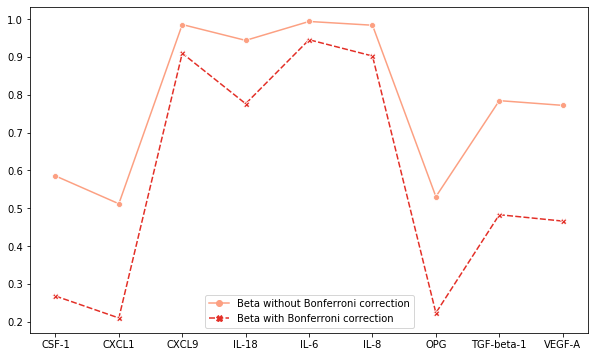

In [45]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
_beta_results_df = pd.DataFrame([],
            columns=["Beta without Bonferroni correction", "Beta with Bonferroni correction"])
_beta_results_df["Beta without Bonferroni correction"] = results_df2["beta"].astype(np.float32)
_beta_results_df["Beta with Bonferroni correction"] = results_df1["beta"].astype(np.float32).T.values
_ = sn.lineplot(data=_beta_results_df, markers=True, ax=ax, palette="Reds")

# Question 2
## Regression modelling

#### The merged table of covariates and biomarkers

In [46]:
regression_df = joined_df.copy()
regression_df.head()

,PatientID,Age,Sex,Smoker,VAS0,VAS12,Timepoint,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,1,56,Male,No,3.0,4.0,0weeks,1-0weeks,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
1,1,56,Male,No,3.0,4.0,6weeks,1-6weeks,7.09,11.61,10.35,7.59,2.25,7.84,9.44,8.42,8.19
2,1,56,Male,No,3.0,4.0,12months,1-12months,8.64,12.48,10.68,8.46,2.56,6.64,9.59,8.79,8.41
3,3,32,Male,No,7.2,0.5,0weeks,3-0weeks,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
4,3,32,Male,No,7.2,0.5,6weeks,3-6weeks,6.40,11.20,10.61,6.65,2.25,5.51,6.62,7.79,8.35


#### Identification and removal of NULL values

#### Identify NA's and remove them
regression_df.isna().sum()

In [47]:
# Drop the NAs
regression_df.drop(index=regression_df[regression_df["VAS12"].isna()].index, inplace=True)

#### Removing values of timepoints other than Week 0 (at inclusion)

In [48]:
# Keep only biomarker levels at inclusion => Timepoint is 0weeks
regression_df = regression_df[regression_df.Timepoint.str.match("0weeks")]
regression_df.head()

,PatientID,Age,Sex,Smoker,VAS0,VAS12,Timepoint,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,1,56,Male,No,3.0,4.0,0weeks,1-0weeks,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,3,32,Male,No,7.2,0.5,0weeks,3-0weeks,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,4,43,Female,No,2.7,0.5,0weeks,4-0weeks,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,5,25,Female,No,3.0,3.9,0weeks,5-0weeks,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,6,39,Male,No,3.5,5.0,0weeks,6-0weeks,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35


#### Removing unecessary columns

In [49]:
# Remove columns PatientID, Timepoint and Biomarker as they are not needed for our regression model
regression_df.drop(columns=["PatientID", "Timepoint", "Biomarker"], inplace=True)
regression_df.head()

,Age,Sex,Smoker,VAS0,VAS12,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,56,Male,No,3.0,4.0,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,32,Male,No,7.2,0.5,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,43,Female,No,2.7,0.5,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,25,Female,No,3.0,3.9,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,39,Male,No,3.5,5.0,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35


In [50]:
print(f"Explanatory variables: {regression_df.columns}")

Explanatory variables: Index(['Age', 'Sex', 'Smoker', 'VAS0', 'VAS12', 'IL-8', 'VEGF-A', 'OPG',
       'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1'],
      dtype='object')


### Boxplots of the different variables for visual inspection

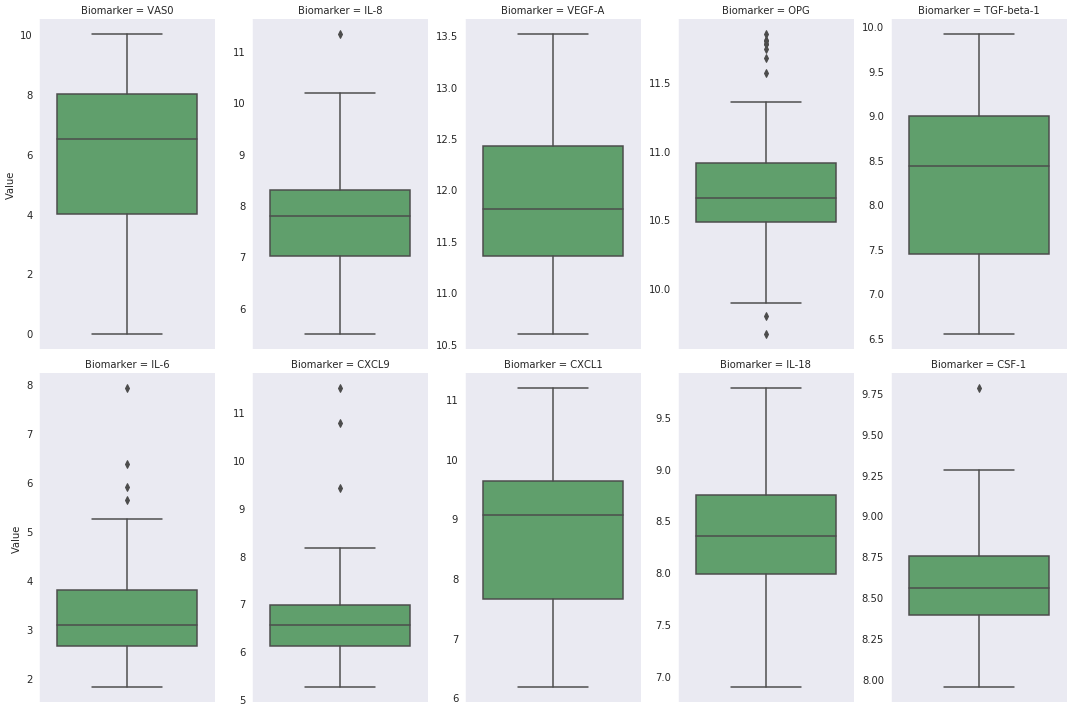

In [51]:
regression_stacked_df = regression_df.loc[:, ["VAS0", *biomarker_columns]].stack(0).reset_index()
regression_stacked_df = regression_stacked_df.iloc[:, 1:]
regression_stacked_df.columns = ["Biomarker", "Value"]

with sn.axes_style("dark"):
    g = sn.catplot(y="Value", col="Biomarker", data=regression_stacked_df, kind="box",
                 height=5, aspect=.6, sharex=False, sharey=False, col_wrap=5, palette=sn.color_palette("summer", 2));
    g.set_axis_labels("")
plt.savefig("./Charts/reg_1.png")    

#### Converting categorical values to numeric

In [52]:
# Convert categorical variable into dummy/indicator variables. The process is calle Binarization.
# regression_df = pd.get_dummies(regression_df, columns=["Smoker", "Sex"], prefix=["Smoker", "Sex"])
regression_df["Smoker"] = regression_df["Smoker"].cat.codes
regression_df["Sex"] = regression_df["Sex"].cat.codes
regression_df.head()

,Age,Sex,Smoker,VAS0,VAS12,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,56,0,1,3.0,4.0,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,32,0,1,7.2,0.5,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,43,1,1,2.7,0.5,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,25,1,1,3.0,3.9,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,39,0,1,3.5,5.0,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35


#### Summary of the variables in use for the modelling

In [53]:
regression_df.describe().round(3)

,Age,Sex,Smoker,VAS0,VAS12,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
count,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000,115.000
mean,41.009,0.496,0.670,5.998,3.634,7.726,11.879,10.732,8.236,3.345,6.625,8.672,8.376,8.599
std,10.170,0.502,0.472,2.689,3.090,0.894,0.674,0.425,0.929,0.998,0.902,1.238,0.601,0.289
min,18.000,0.000,0.000,0.000,0.000,5.500,10.600,9.670,6.550,1.810,5.250,6.170,6.890,7.950
25%,32.000,0.000,0.000,4.000,0.700,7.010,11.355,10.480,7.445,2.655,6.110,7.655,7.985,8.390
50%,41.000,0.000,1.000,6.500,3.500,7.790,11.810,10.660,8.430,3.080,6.560,9.070,8.350,8.560
75%,49.000,1.000,1.000,8.000,6.000,8.290,12.425,10.910,8.995,3.790,6.970,9.635,8.750,8.755
max,59.000,1.000,1.000,10.000,10.000,11.330,13.510,11.850,9.910,7.910,11.510,11.190,9.780,9.780


In [54]:
# regression_df.to_csv("regression_df.csv", index=False)

#### Separating the dependant from the independant variables

In [55]:
# 12-month VAS as the response variable => y=VAS12
# biomarker levels at inclusion and covariates as explanatory variables
y = regression_df["VAS12"]
X = regression_df.drop(columns="VAS12")
X.head()

,Age,Sex,Smoker,VAS0,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,56,0,1,3.0,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,32,0,1,7.2,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,43,1,1,2.7,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,25,1,1,3.0,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,39,0,1,3.5,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35


### Plotting the correlation between the independent and the dependent variables

<Figure size 2160x720 with 0 Axes>

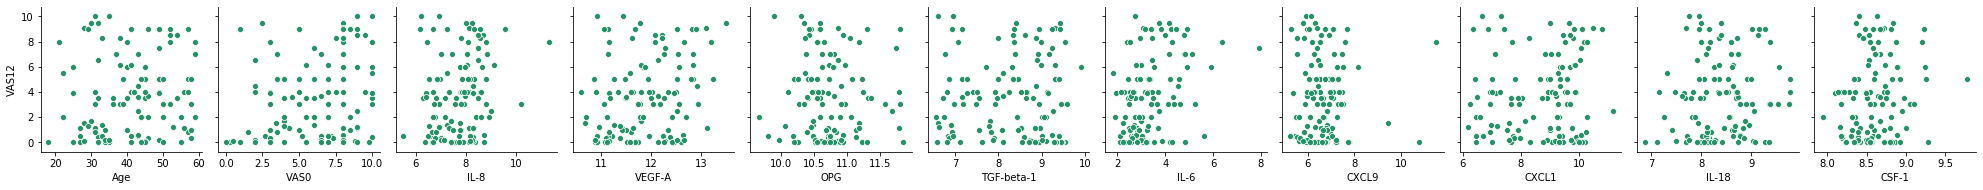

In [56]:
X_non_categorical_columns = list(X.columns)
del(X_non_categorical_columns[1])
del(X_non_categorical_columns[1])
plt.figure(figsize=(30,10))
sn.pairplot(regression_df, y_vars=["VAS12"], x_vars=X_non_categorical_columns)
plt.savefig("./Charts/reg_2.png")

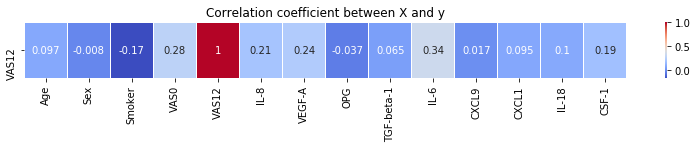

In [57]:
plt.figure(figsize=(11,2))
variables_corr = pd.DataFrame(regression_df.corr()["VAS12"]).T.round(3)
sn.heatmap(variables_corr, annot=True, linewidth=.1, cmap="coolwarm")
plt.tight_layout()
plt.title("Correlation coefficient between X and y")
plt.savefig("./Charts/reg_3.png")

Search for outliers, the outliers identified earlier were withing the same Biomarker for two different samples so we cannot use the previous method and instead we will have to search for outliers in the entire sample of each Biomarker without disaggregation by sex.

### Plotting the correlation between the independent variables

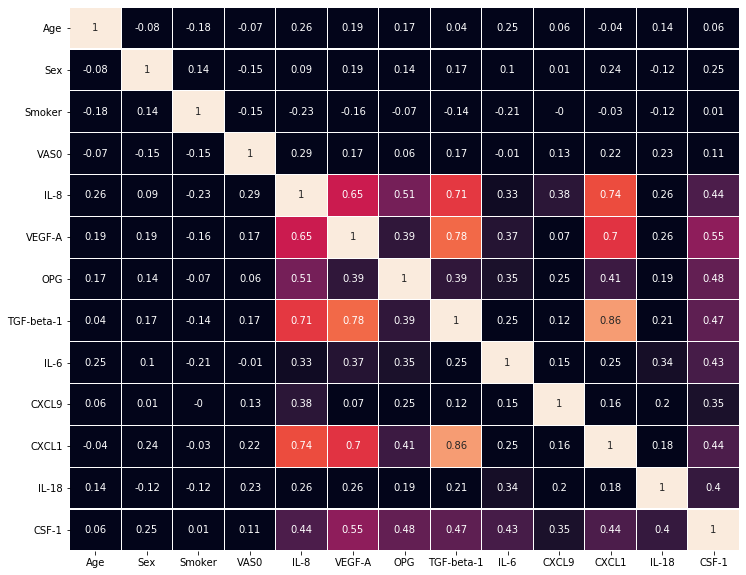

In [58]:
plt.figure(figsize=(12,10))
variables_corr = X.corr().round(2)
sn.heatmap(variables_corr, annot=True, linewidths=.1, vmin=0.3, cbar=False)
plt.savefig("./Charts/reg_6.png")

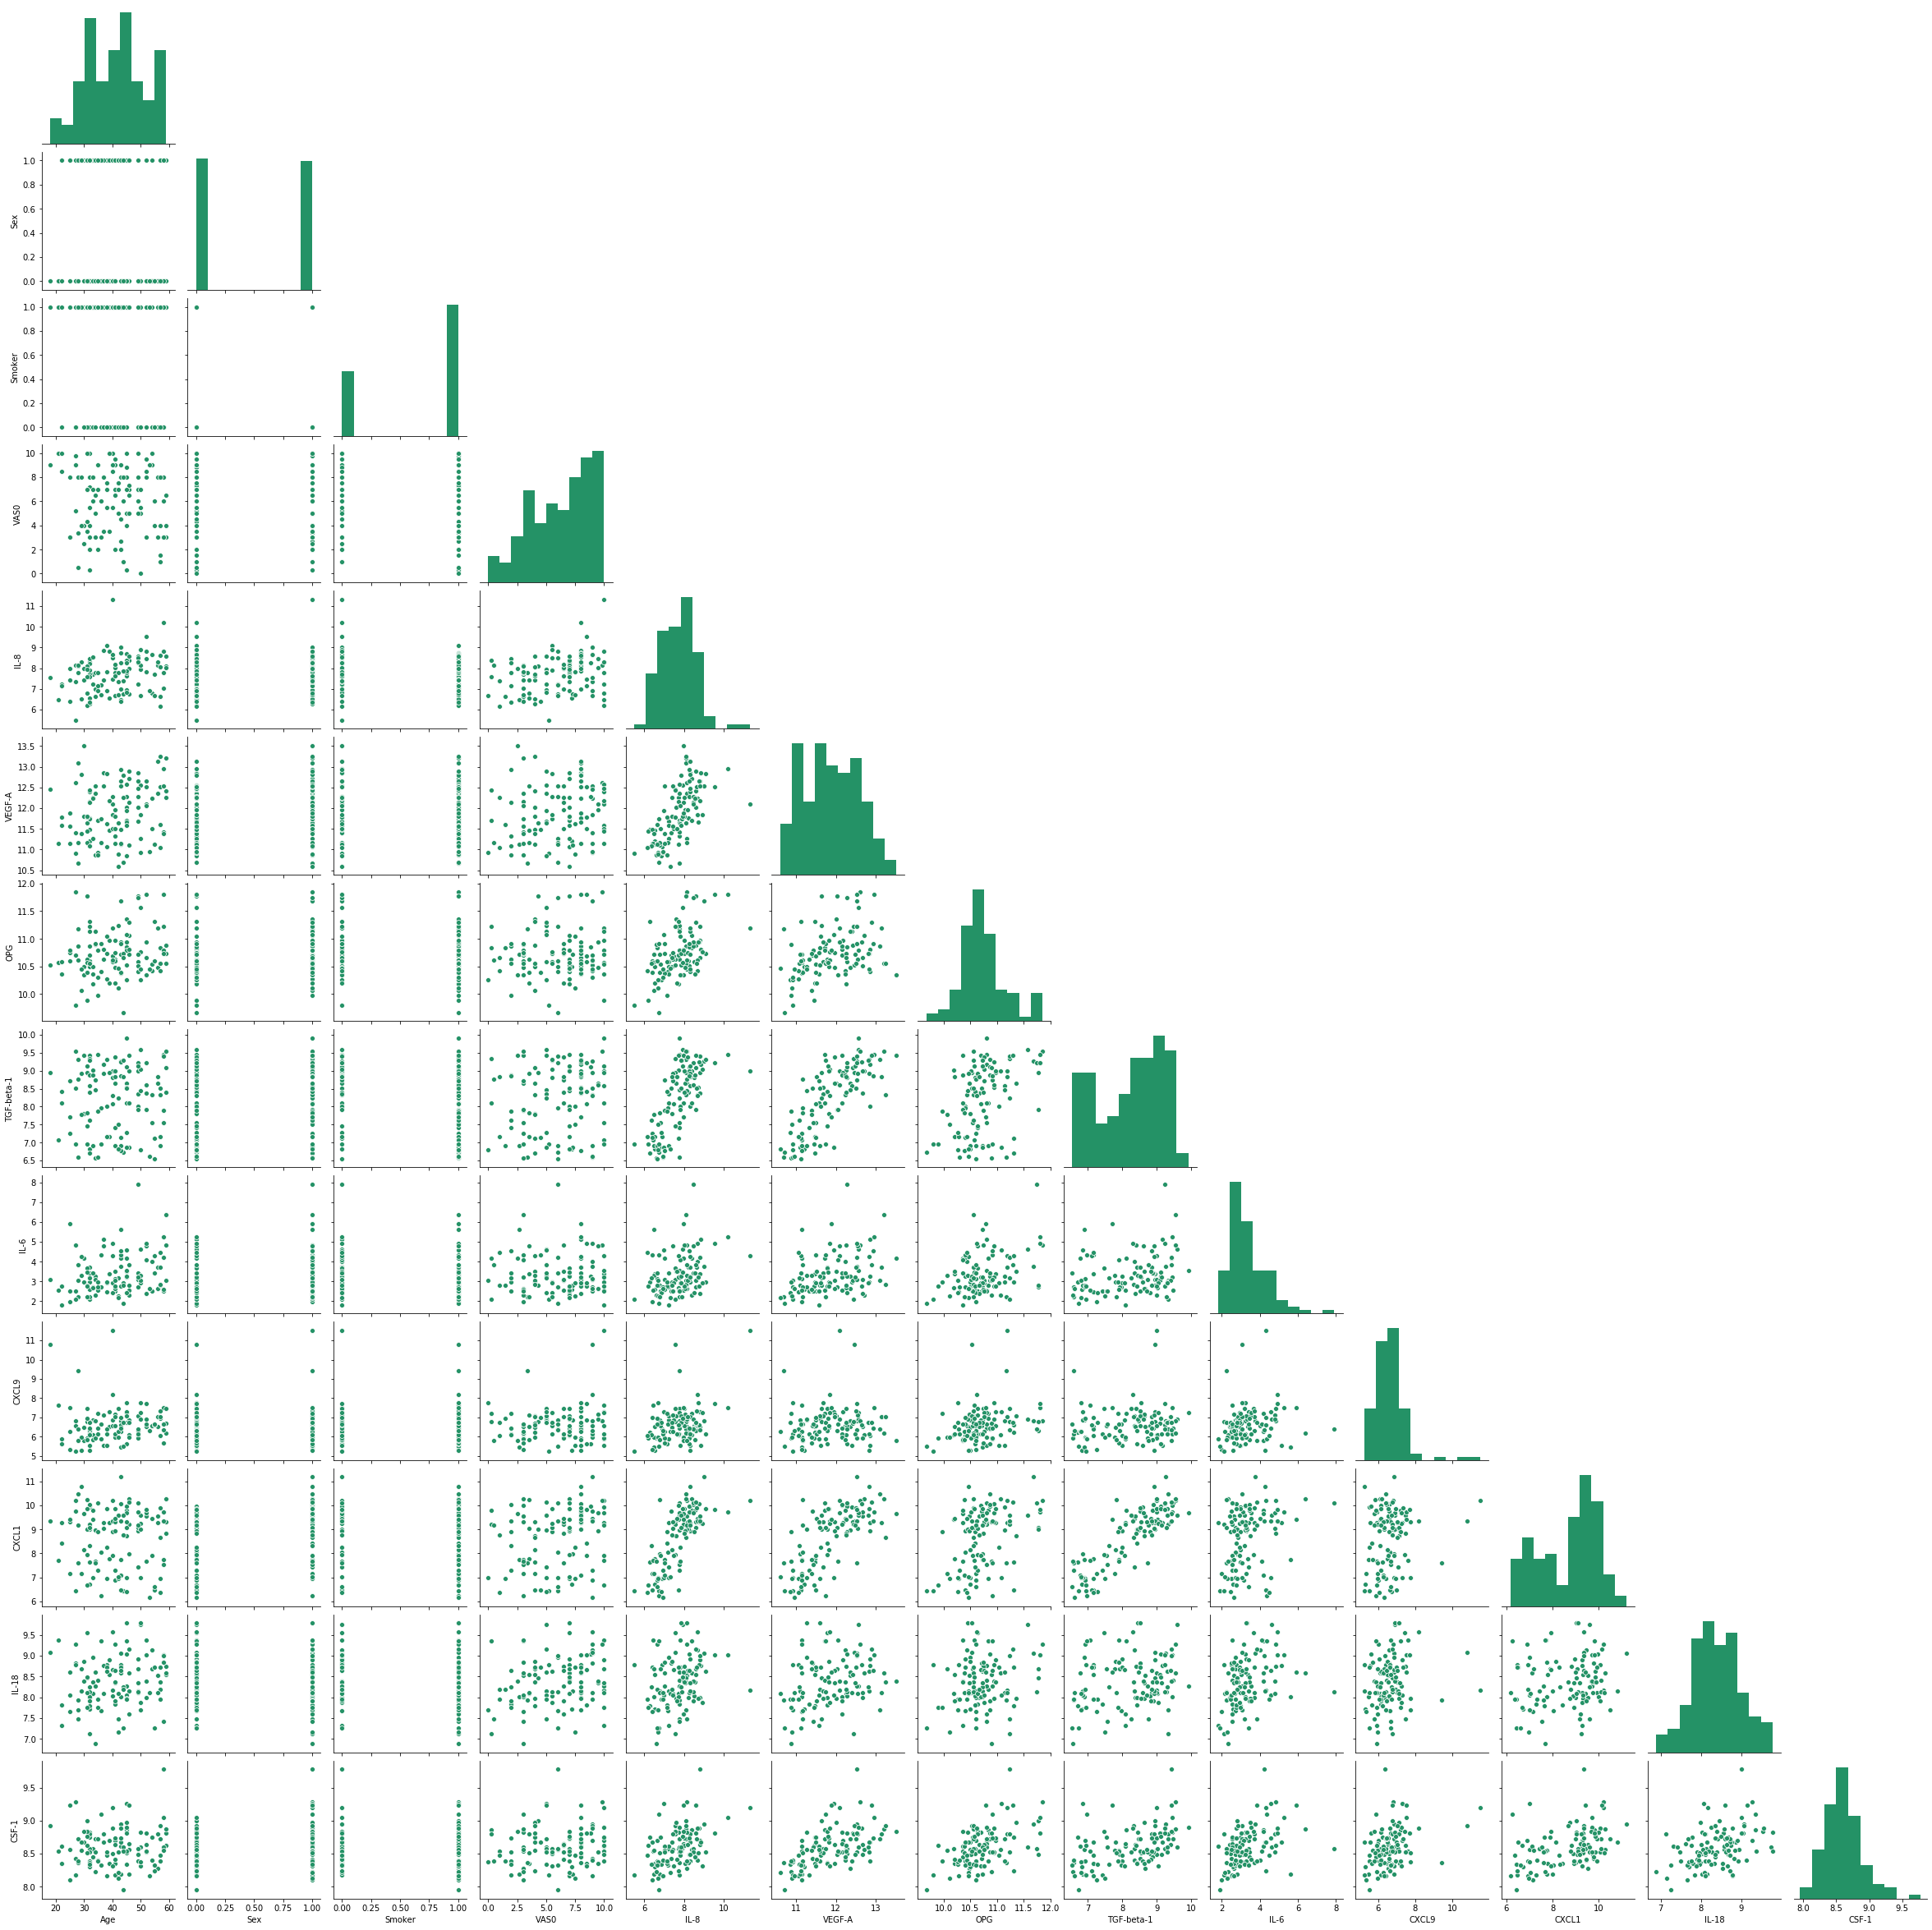

In [59]:
sn.pairplot(X.loc[:, "Age":"CSF-1"], corner=True)

### Creating and fitting the Regression model

Coeficients: [-0.01950044 -0.31753944 -0.15808482  0.29200592  1.11739608  1.48879414
 -2.12617271 -1.79453479  1.25436735 -0.74323047  0.08640174 -0.39275316
  2.43405859]
Intercept: -3.2927544498401584
Rank: 13
Singular: [94.03703773 25.84102834 16.56856551  9.11316398  7.72526429  5.23909697
  4.73472988  4.32085826  4.11422903  3.77958661  3.24704422  2.93553549
  1.75023359]
R^2 for training data: 0.364759585430106
R^2 for test data: -0.04805081169991877
Mean squared error: 8.93
Coefficient of determination for test data: -0.05


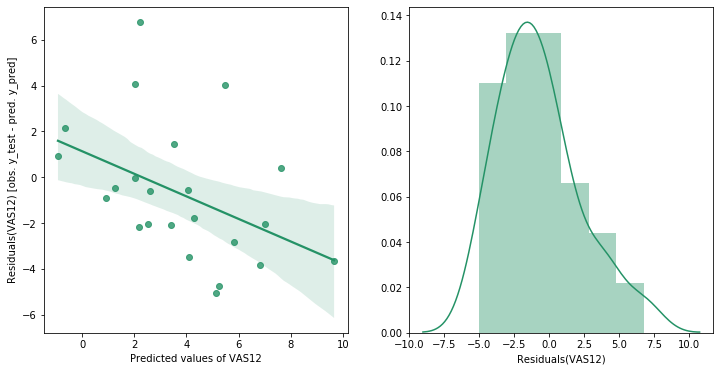

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=14)
regressor = LinearRegression().fit(X=X_train, y=y_train)
y_pred = regressor.predict(X_test)

print(f"Coeficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"Rank: {regressor.rank_}")
print(f"Singular: {regressor.singular_}")

# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print(f"R^2 for training data: {regressor.score(X_train,y_train)}") # the coefficient of determination R^2 of the prediction.
print(f"R^2 for test data: {regressor.score(X_test,y_test)}")

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination for test data: %.2f'
      % r2_score(y_test, y_pred))

residuals = y_test - y_pred

plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
sn.regplot(x=y_pred, y=residuals, ax=ax)
ax.set_ylabel("Residuals(VAS12) [obs. y_test - pred. y_pred]")
ax.set_xlabel("Predicted values of VAS12")

ax = plt.subplot(1,2,2)
sn.distplot(residuals)
ax.set_xlabel("Residuals(VAS12)")
plt.savefig("./Charts/reg_5.png")

#### Verify the results of the previous model using an alternative library

In [61]:
_n = X_train.shape[0]
_X_train = np.c_[np.ones(_n), X_train]
_X_train = pd.DataFrame(_X_train, columns=["Intercept", *(X_train.columns)])
_ols = OLS(y_train,_X_train.values)
_olsf = _ols.fit()
_olsf.summary(xname=list(_X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VAS12   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     3.445
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           0.000315
Time:                        16:35:10   Log-Likelihood:                -213.65
No. Observations:                  92   AIC:                             455.3
Df Residuals:                      78   BIC:                             490.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2928     10.893     -0.302      0.763     -24.980      18.394
Age           -0.0195      0.034     -0.570      0.571      -0.088       0.049
Sex           -0.3175      0.618     -0.514      0.609      -1.549       0.913
Smoker        -0.1581      0.660     -0.239      0.811      -1.472       1.156
VAS0           0.2920      0.114      2.556      0.013       0.065       0.519
IL-8           1.1174      0.620      1.801      0.076      -0.118       2.353
VEGF-A         1.4888      0.761      1.957      0.054      -0.026       3.003
OPG           -2.1262      0.827     -2.572      0.012      -3.772      -0.481
TGF-beta-1    -1.7945      0.714     -2.515      0.014      -3.215      -0.374
IL-6           1.2544      0.379      3.306      0.001       0.499       2.010
CXCL9         -0.7432      0.377     -1.972      0.052      -1.494       0.007
CXCL1          0.0864      0.539      0.160      0.873      -0.986       1.159
IL-18         -0.3928      0.543     -0.723      0.472      -1.474       0.688
CSF-1          2.4341      1.462      1.664      0.100      -0.478       5.346
==============================================================================
Omnibus:                        3.025   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.033
Skew:                           0.160   Prob(JB):                        0.362
Kurtosis:                       2.345   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Plot a QQ-Plot of the residuals
This plot is used to visualise the normality of the residuals

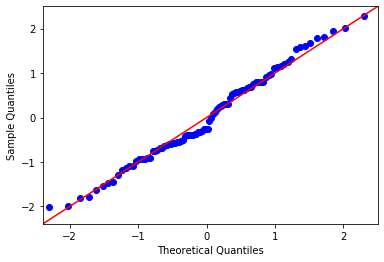

In [64]:
fig = sma.qqplot(_olsf.resid, st.t, fit=True, line='45')
plt.show()

### Try to fit the model again but after adjusting the data
Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

Scaling using median and quantiles consists of subtracting the median to all the observations and then dividing by the interquartile difference. It Scales features using statistics that are robust to outliers.
*https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff*
*https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py*
*https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler*


In [65]:
Q1_X = X.quantile(0.25)
Q3_X = X.quantile(0.75)
IQR_X = Q3_X - Q1_X

filter_X = (X < (Q1_X - 1.5 * IQR_X)) | (X > (Q3_X + 1.5 * IQR_X))

filtered_X = X.iloc[:,3:].mask(filter_X.iloc[:,3:]).fillna(X.iloc[:,3:].mean(skipna=True))
filtered_X = X.iloc[:,0:3].join(filtered_X)

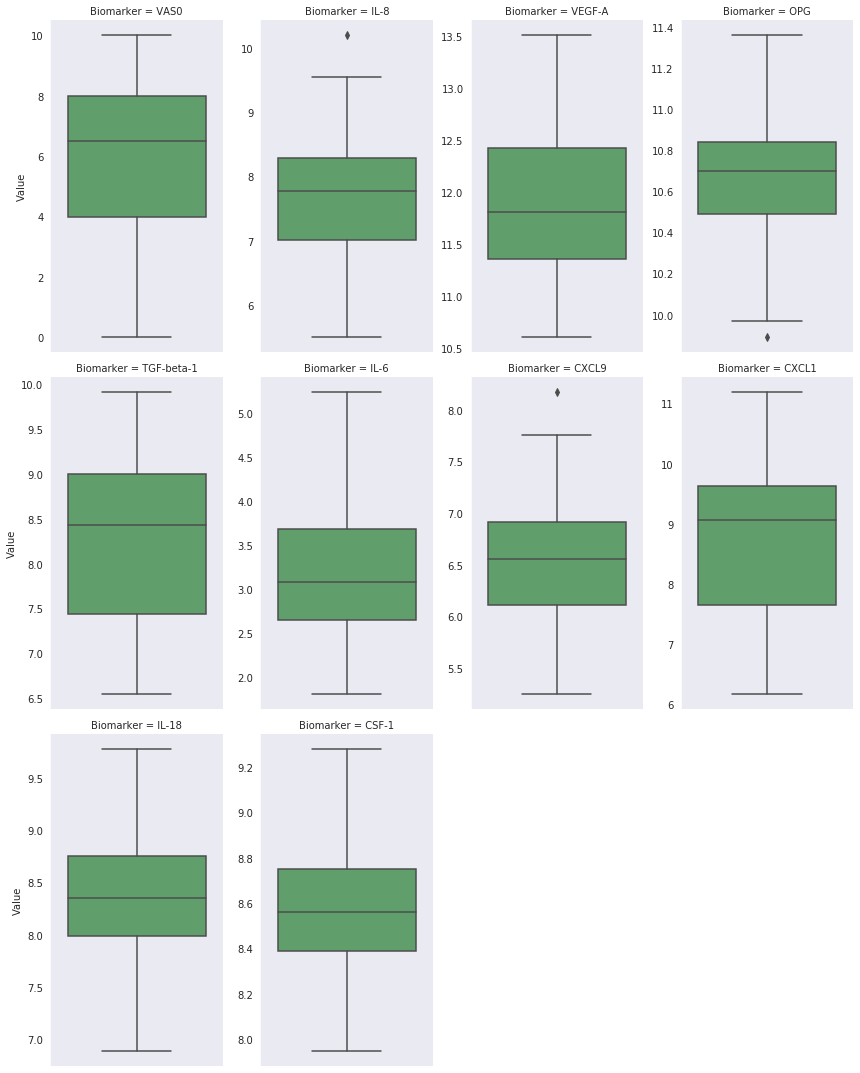

In [66]:
regression_stacked_df = filtered_X.loc[:, ["VAS0", *biomarker_columns]].stack(0).reset_index()
regression_stacked_df = regression_stacked_df.iloc[:, 1:]
regression_stacked_df.columns = ["Biomarker", "Value"]

with sn.axes_style("dark"):
    g = sn.catplot(y="Value", col="Biomarker", data=regression_stacked_df, kind="box",
                 height=5, aspect=.6, sharex=False, sharey=False, col_wrap=4, palette=sn.color_palette("summer", 2));
    g.set_axis_labels("")

Coeficients: [ 0.89502985 -0.64238208  1.42587032]
Intercept: 3.76830567228621
Rank: 3
Singular: [11.07151384  9.57399617  7.04310514]
R^2 for training data: 0.2266573053692228
R^2 for test data: 0.22182503424161068
Mean squared error: 6.63
Coefficient of determination: 0.22


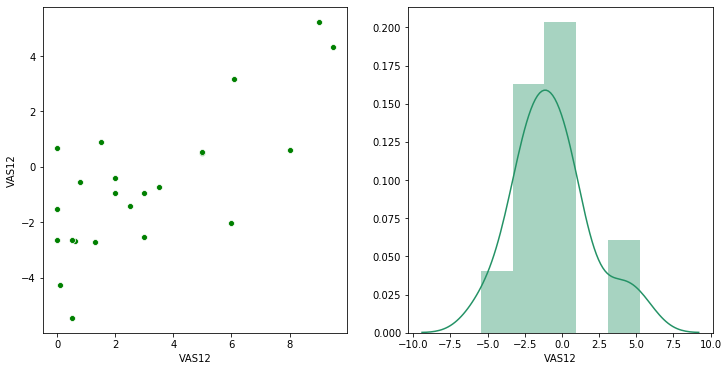

In [67]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Fit the model only using VAS0, OPG and IL-6 variables
X_mod = X[["VAS0", "OPG", "IL-6"]]

# Scale the data using a Standard Scaler to avoid giving more weight to one variable then the other
X_scaled = StandardScaler().fit_transform(X_mod)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=14)

regressor = LinearRegression().fit(X=X_train, y=y_train)
y_pred = regressor.predict(X_test)
print(f"Coeficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"Rank: {regressor.rank_}")
print(f"Singular: {regressor.singular_}")

# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print(f"R^2 for training data: {regressor.score(X_train,y_train)}") # the coefficient of determination R^2 of the prediction.
print(f"R^2 for test data: {regressor.score(X_test,y_test)}")

# The mean squared error for the predicted values
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination of the predicted values: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

residuals = y_test - y_pred

plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
sn.scatterplot(x=y_test, y=residuals, ax=ax, color="green")
ax = plt.subplot(1,2,2)
_ = sn.distplot(residuals)

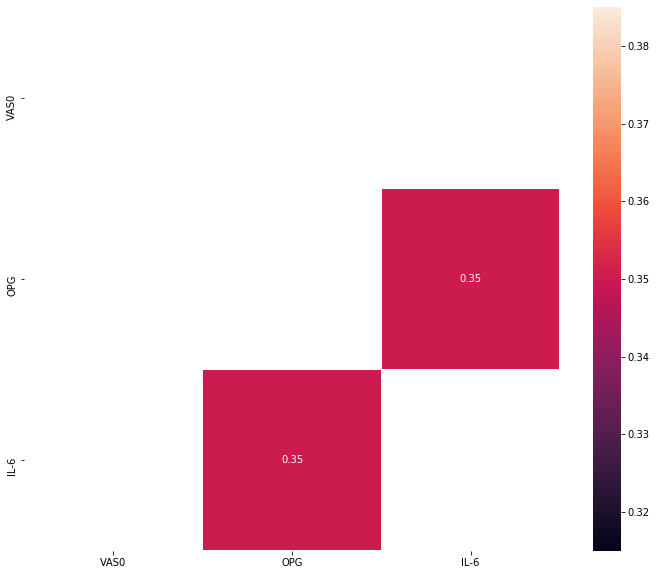

In [68]:
plt.figure(figsize=(12,10))
variables_corr = X_mod.corr().round(2)
_ = sn.heatmap(variables_corr[(variables_corr.abs()>=.3) & (variables_corr.abs()<1)], annot=True, linewidths=.1)

#### Verify the results of the previous model using an alternative library

In [69]:
_n = X_train.shape[0]
_X_train = np.c_[np.ones(_n), X_train]
_X_train = pd.DataFrame(_X_train, columns=["Intercept", "VAS0", "OPG", "IL-6"])
_ols = OLS(y_train,_X_train.values)
_olsf = _ols.fit()
_olsf.summary(xname=list(_X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VAS12   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     8.597
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.57e-05
Time:                        16:36:16   Log-Likelihood:                -222.70
No. Observations:                  92   AIC:                             453.4
Df Residuals:                      88   BIC:                             463.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7683      0.291     12.950      0.000       3.190       4.347
VAS0           0.8950      0.292      3.062      0.003       0.314       1.476
OPG           -0.6424      0.322     -1.996      0.049      -1.282      -0.003
IL-6           1.4259      0.339      4.204      0.000       0.752       2.100
==============================================================================
Omnibus:                        5.477   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.299
Skew:                           0.270   Prob(JB):                        0.192
Kurtosis:                       2.245   Cond. No.                         1.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot a QQ-Plot of the residuals
This plot is used to visualise the normality of the residuals

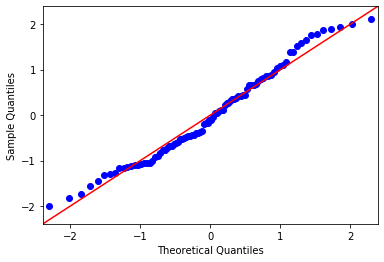

In [70]:
fig = sma.qqplot(_olsf.resid, st.t, fit=True, line='45')
plt.show()